In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform
from skimage.io import imread, imshow
import math

In [96]:
# downsample
image = cv2.imread("./images/truth.png")
ratio = 8
height = image.shape[0] // ratio
width = image.shape[1] // ratio
resized = cv2.resize(image, (width, height), interpolation=cv2.INTER_LINEAR) # bilinear interpolation

In [7]:
circled = resized.copy()

maxRadius = int(1.1 * (width)) # hardcoded
minRadius = int(0.9 * (width)) # hardcoded

gray = cv2.cvtColor(circled, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(image=gray, 
                           method=cv2.HOUGH_GRADIENT, 
                           dp=1.2, 
                           minDist=2*minRadius,
                           param1=50,
                           param2=50,
                           minRadius=minRadius,
                           maxRadius=maxRadius                           
                          )

circled_resize = resized.copy()
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circlesRound = np.round(circles[0, :]).astype("int")
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circlesRound:
        x //= ratio
        y //= ratio
        r //= ratio
        cv2.circle(circled_resize, (x, y), r, (0, 255, 0), 4)
        cv2.circle(circled_resize, (x, y), radius=1, color=(0, 0, 255), thickness=2)
        print(x, y)
    
    print("Detected Marker Centers:", len(circlesRound))
    # cv2.imwrite("./circle_detected.png", circled_resize)
    plt.imshow(circled_resize)
    plt.show()

In [97]:
img_mapping = resized.copy()
origins = [[262, 98], [262, 285], [518, 285], [518, 98]]
for (x, y) in origins:
    cv2.circle(img_mapping, (x, y), radius=1, color=(0, 0, 255), thickness=2)
cv2.imwrite("./img_mapping.png", img_mapping)

True

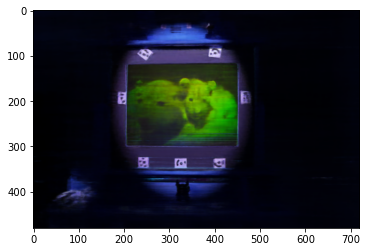

In [118]:
rendered_img = cv2.imread("./images/lioncubs_row_nerfmm.png")
ratio = 2
height = rendered_img.shape[0] // ratio
width = rendered_img.shape[1] // ratio
rendered_img = cv2.resize(rendered_img, (width, height), interpolation=cv2.INTER_LINEAR) # bilinear interpolation
manual = rendered_img.copy()

interest = [[205, 118], [205, 296], [450, 296], [450, 118]]
# for (x, y) in interest:
#     cv2.circle(manual, (x, y), radius=1, color=(0, 0, 255), thickness=2)
cv2.imwrite("./manual.png", manual)
plt.imshow(manual)
plt.show()

<Figure size 640x480 with 0 Axes>

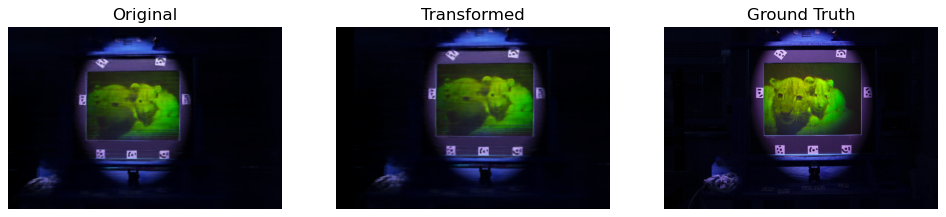

In [119]:
# homography
# reference: https://learnopencv.com/homography-examples-using-opencv-python-c/
rendered_img = cv2.imread("./manual.png")
# ratio = 2
# height = rendered_img.shape[0] // ratio
# width = rendered_img.shape[1] // ratio
# rendered_img = cv2.resize(rendered_img, (width, height), interpolation=cv2.INTER_LINEAR) # bilinear interpolation
manual = rendered_img.copy()
# image = cv2.imread("./example/downsampled.png")
# resized = image.copy()

points_of_interest = np.array(interest)
projection = np.array(origins)
h, status = cv2.findHomography(points_of_interest, projection)
im_dst = cv2.warpPerspective(manual, h, (resized.shape[1], resized.shape[0]))
cv2.imwrite("./tf_img_warp.png", im_dst) 

plt.figure(num=None, figsize=(8, 6), dpi=80)
fig, ax = plt.subplots(1,3, figsize=(15, 10), dpi = 80)
ax[0].set_title(f'Original', fontsize = 15)
ax[0].imshow(rendered_img)
ax[0].set_axis_off()
ax[1].set_title(f'Transformed', fontsize = 15)
ax[1].imshow(im_dst)
ax[1].set_axis_off()
ax[2].set_title(f'Ground Truth', fontsize = 15)
ax[2].imshow(resized)
ax[2].set_axis_off()


True

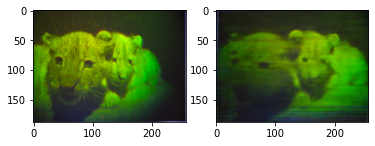

In [120]:
# crop inner-marker area
image = cv2.imread("./images/truth.png")
ratio = 8
height = image.shape[0] // ratio
width = image.shape[1] // ratio
resized = cv2.resize(image, (width, height), interpolation=cv2.INTER_LINEAR) # bilinear interpolation
registered = cv2.imread("./tf_img_warp.png")

# img crop reference: https://stackoverflow.com/a/54885575
# img[top_left_y:bot_right_y, top_left_x:bot_right_x]
# [[262, 98], [262, 285], [518, 285], [518, 98]]
truth_crop = resized[98 : 285 + 1, 262 : 518 + 1]
render_crop = registered[98 : 285 + 1, 262 : 518 + 1]

f, ax = plt.subplots(1,2)
ax[0].imshow(truth_crop)
ax[1].imshow(render_crop)
# cv2.imwrite("./images/truth_crop.png", truth_crop) 
cv2.imwrite("./images/lioncubs_row_nerfmm_crop.png", render_crop) 